In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide the solution."></form>''')

One of the least effective way to figure out $\pi$ is to use a Monte-Carlo sampling method.

We will sample points randomly in the interval $[-\frac{1}{2}, \frac{1}{2}]^2$ (2D).
The ratio of points that fall in a circle of radius $R=\frac{1}{2}$ vs those in the square $[-\frac{1}{2}, \frac{1}{2}]^2$ is equal to $\frac{\pi R^2}{1}=\frac{1}{4}\pi$

Implement the following algorithm:

- loop for n iterations
  - pick two numbers randomly between $-\frac{1}{2}$ and $\frac{1}{2}$
  - if the numbers fall inside the circle then add it to list `in_circle`
    That means $x^2 + y^2 \leq R^2$
  - otherwise add it to another `out_of_circle`
  
- Compute pi using the lengths of the two lists, e.g $\frac{4n_0}{n_0+n_1}$, with $n_0$ the length `in_circle` and $n_1$ the length of `out_of_circle`.
- plot the two sets of points in different colors

In [3]:
from numpy.random import random

N = 1000
in_circle, out_circle = [], []
radius = 0.5

def add_sample(in_circle, out_circle, radius):
    point = random() - 0.5, random() - 0.5
    if point[0] * point[0] + point[1] * point[1] <= radius * radius:
        in_circle.append(point)
    else:
        out_circle.append(point)
        
for i in range(N):
    add_sample(in_circle, out_circle, radius)

assert N == len(in_circle) + len(out_circle)
print("Pi is PI? ", 4 * float(len(in_circle)) / N)

Pi is PI?  3.076


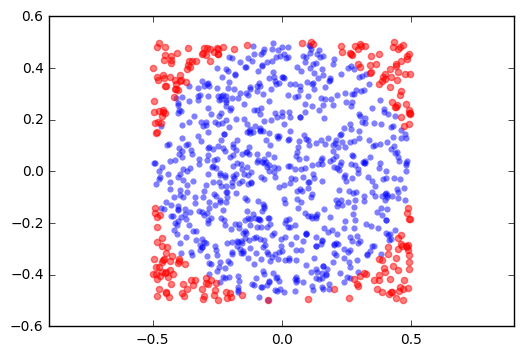

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import array

in_circle = array(in_circle)
out_circle = array(out_circle)

plt.scatter(in_circle[:, 0], in_circle[:, 1], linewidth=0, alpha=0.5)
plt.scatter(out_circle[:, 0], out_circle[:, 1], alpha=0.5, color='red')
plt.axis('equal')
plt.show()

We could also use the numpy library to do the work for us:

In [6]:
from numpy import random, sum
N = 1000
radius = 0.5
all_points = random.random((N, 2)) - 0.5
norms = sum(all_points * all_points, axis=1)
n_in_circle = len(all_points[norms < radius * radius])

print("Pi is ", 4 * float(n_in_circle) / len(all_points))

Pi is  3.104


# Compute Factorial N

In [7]:
def factorial(N):
    if N == 1:
        return 1
    else:
        return N * factorial(N - 1)

In [8]:
assert factorial(1) == 1
assert factorial(2) == 2
assert factorial(5) == 5 * 4 * 3 * 2 * 1

# Ceasar Cipher

https://en.wikipedia.org/wiki/Caesar_cipher

In [9]:
def caesar_salad(input, n=13):
    alphabet = "abcdefghijklmnopqrstuvwxyz"
    rotabet = alphabet[n:] + alphabet[:n] 
    
    result = ""
    for letter in input:
        index = alphabet.find(letter.lower())
        if index == -1:
            result += letter
        elif letter.islower():
            result += rotabet[index]
        else:
            result += rotabet[index].upper()
        
    
    return result

In [10]:
assert caesar_salad("caesar", n=0) == "caesar"
assert caesar_salad("a", n = 1) == "b"
assert caesar_salad("az", n = 1) == "ba"
assert caesar_salad("AaZz", n = 1) == "BbAa"
assert caesar_salad("Aa!Z z", n = 1) == "Bb!A a"

In [11]:
caesar_salad(caesar_salad("Anything!?", n =12), n = 26 - 12)

'Anything!?'